# Generacion de pulsos con diferentes alturas

Se importaran mediante pandas las alturas deseadas para la distribucion

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydwf.utilities import openDwfDevice
from pydwf import DwfLibrary
from pydwf.core.api.analog_out import DwfAnalogOutNode, DwfAnalogOutFunction
import time


Vector cargado desde el CSV:


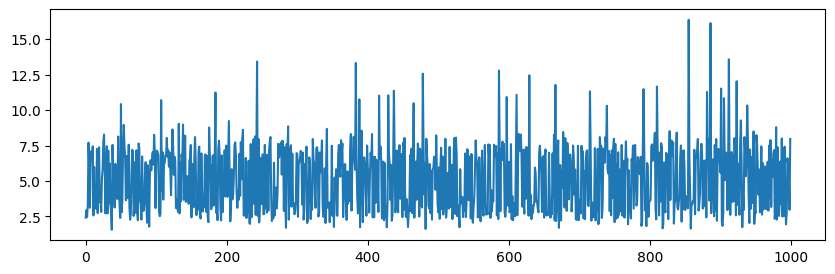

In [98]:
# --- Cargar el vector desde el archivo CSV ---
filename = "alturas.csv"
loaded_df = pd.read_csv(filename)  # Leer el archivo CSV
loaded_vector = loaded_df["Values"].values  # Convertir la columna de nuevo a un array
print("Vector cargado desde el CSV:")
plt.figure(figsize=(10,3))
plt.plot(loaded_vector)

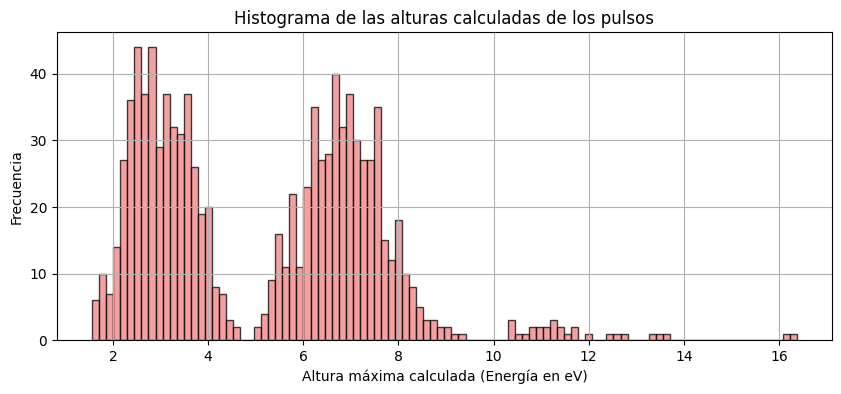

In [99]:
plt.figure(figsize=(10, 4))
plt.hist(loaded_vector, bins=100, alpha=0.75, edgecolor='black', color='lightcoral')
plt.xlabel('Altura máxima calculada (Energía en eV)')
plt.ylabel('Frecuencia')
plt.title('Histograma de las alturas calculadas de los pulsos')
plt.grid()
plt.show()

In [119]:
# --- Configuración de parámetros ---
fs = 1e6  # Frecuencia de muestreo: 10 kHz
duration = 0.02  # Duración total de cada pulso (en segundos)
num_points = int(fs * duration)

# Modelo de la señal: pulso único
def radiation_event(t, t_0, A, tau_D, tau_R):
    return A * (np.exp(-(t - t_0) / tau_D) - np.exp(-(t - t_0) / tau_R))

# Especificar los parámetros de los pulsos
pulse_amplitudes = loaded_vector  # Alturas de los pulsos
pulse_positions = 0.0002 * np.ones(len(loaded_vector))  # Posiciones iniciales dentro del rango de tiempo
tau_D, tau_R = 0.000025, 0.000001  # Constantes de decaimiento



In [120]:
# Crear instancia de la biblioteca DWF
dwf = DwfLibrary()

# --- Conectar al dispositivo Analog Discovery ---
with openDwfDevice(dwf) as device:  # Abre el dispositivo conectado
    print("Analog Discovery conectado.")

    analog_out = device.analogOut

    # Configurar el Waveform Generator
    analog_out.nodeEnableSet(0, DwfAnalogOutNode.Carrier, True)  # Habilitar el nodo de salida
    analog_out.nodeFunctionSet(0, DwfAnalogOutNode.Carrier, DwfAnalogOutFunction.Custom)  # Señal personalizada

    # Iterar sobre los pulsos y enviarlos
    for i, (A, t_0) in enumerate(zip(pulse_amplitudes, pulse_positions)):
        print(f"Generando pulso {i+1} con amplitud {A} y tiempo inicial {t_0}s.")

        # Generar el pulso
        t = np.linspace(0, duration, num_points)
        pulse = radiation_event(t, t_0, A, tau_D, tau_R)
        pulse[t < t_0] = 0  # Limitar el pulso a valores después de t_0

        # Normalizar el pulso
        pulse = pulse / np.max(pulse_amplitudes)   # Escalar a rango -2V a +2V

        # Configurar y enviar el pulso al Wavegen
        analog_out.nodeDataSet(0, DwfAnalogOutNode.Carrier, pulse)
        analog_out.frequencySet(0, fs / num_points)  # Configurar frecuencia de muestreo
        analog_out.amplitudeSet(0, 1)
        analog_out.configure(0, True)  # Iniciar la salida
        print(f"Pulso {i+1} enviado.")

        # Esperar antes de enviar el siguiente pulso
        time.sleep(duration)  # Ajustar el tiempo de espera según sea necesario

    # Apagar el generador al finalizar
    analog_out.configure(0, False)
    print("Generación de pulsos finalizada.")

Analog Discovery conectado.
Generando pulso 1 con amplitud 2.416915040228555 y tiempo inicial 0.0002s.
Pulso 1 enviado.
Generando pulso 2 con amplitud 2.9527845487882227 y tiempo inicial 0.0002s.
Pulso 2 enviado.
Generando pulso 3 con amplitud 2.4565503483387805 y tiempo inicial 0.0002s.
Pulso 3 enviado.
Generando pulso 4 con amplitud 3.369939556044598 y tiempo inicial 0.0002s.
Pulso 4 enviado.
Generando pulso 5 con amplitud 7.703657904592978 y tiempo inicial 0.0002s.
Pulso 5 enviado.
Generando pulso 6 con amplitud 5.81475085694592 y tiempo inicial 0.0002s.
Pulso 6 enviado.
Generando pulso 7 con amplitud 3.112256363203541 y tiempo inicial 0.0002s.
Pulso 7 enviado.
Generando pulso 8 con amplitud 6.2513266724586725 y tiempo inicial 0.0002s.
Pulso 8 enviado.
Generando pulso 9 con amplitud 7.107764288482375 y tiempo inicial 0.0002s.
Pulso 9 enviado.
Generando pulso 10 con amplitud 6.551913009089293 y tiempo inicial 0.0002s.
Pulso 10 enviado.
Generando pulso 11 con amplitud 7.44609647415718